In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn import regplot
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns; sns.set(color_codes=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA
import graphviz
from time import time

In [2]:
f = pd.read_csv('Training_values.csv')
l = pd.read_csv('Training_labels.csv')
df = pd.merge(l,f,on='row_id')
df.head()

,row_id,heart_disease_mortality_per_100k,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,312,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,...,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a
1,1,257,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,...,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a
2,4,195,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,...,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b
3,5,218,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,...,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b
4,6,355,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,...,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a


In [3]:
df = df.sort_values(by = 'row_id')
df.head()

,row_id,heart_disease_mortality_per_100k,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,312,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,...,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a
1,1,257,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,...,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a
2,4,195,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,...,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b
3,5,218,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,...,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b
4,6,355,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,...,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a


In [4]:
for i in range(35):
    num = df.iloc[:,i].isna().sum()
    print(df.columns[i],num)

row_id 0
heart_disease_mortality_per_100k 0
area__rucc 0
area__urban_influence 0
econ__economic_typology 0
econ__pct_civilian_labor 0
econ__pct_unemployment 0
econ__pct_uninsured_adults 2
econ__pct_uninsured_children 2
demo__pct_female 2
demo__pct_below_18_years_of_age 2
demo__pct_aged_65_years_and_older 2
demo__pct_hispanic 2
demo__pct_non_hispanic_african_american 2
demo__pct_non_hispanic_white 2
demo__pct_american_indian_or_alaskan_native 2
demo__pct_asian 2
demo__pct_adults_less_than_a_high_school_diploma 0
demo__pct_adults_with_high_school_diploma 0
demo__pct_adults_with_some_college 0
demo__pct_adults_bachelors_or_higher 0
demo__birth_rate_per_1k 0
demo__death_rate_per_1k 0
health__pct_adult_obesity 2
health__pct_adult_smoking 464
health__pct_diabetes 2
health__pct_low_birthweight 182
health__pct_excessive_drinking 978
health__pct_physical_inacticity 2
health__air_pollution_particulate_matter 28
health__homicides_per_100k 1967
health__motor_vehicle_crash_deaths_per_100k 417
healt

In [5]:
df = df.fillna(df.mean())

In [6]:
features = df.drop(['heart_disease_mortality_per_100k','row_id'],axis=1)
features = pd.get_dummies(features)
target = df['heart_disease_mortality_per_100k']
features = (features - features.mean())/features.std()

# Split train and test dataset with ratio 0.8 and 0.2

In [7]:
df.drop(['row_id'],axis=1,inplace = True)
(train,test) = train_test_split(df,train_size=0.8,test_size=0.2)
features_train = train.drop(df.columns[0],axis=1)
features_train = pd.get_dummies(features_train)
features_train = (features_train - features_train.mean())/features_train.std()
targets_train = train.heart_disease_mortality_per_100k
features_test = test.drop(df.columns[0],axis=1)
features_test = pd.get_dummies(features_test)
features_test = (features_test - features_test.mean())/features_test.std()
targets_test = test.heart_disease_mortality_per_100k

# Lasso

C:\Users\lyum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\lyum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 760726.5333601573, tolerance: 616.4569372434019
  positive)
C:\Users\lyum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 758368.499214977, tolerance: 599.1510648680352
  positive)
C:\Users\lyum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671786.2983638099


best alpha {'alpha': 0.01} test_R2 0.6754318265488245


AttributeError: 'tuple' object has no attribute 'sort_values'

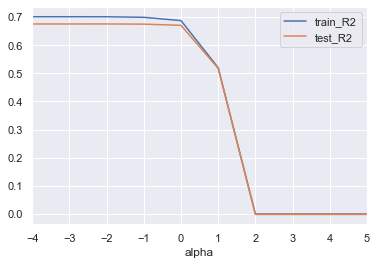

In [8]:
grid = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
lasso = Lasso()
lassoCV = GridSearchCV(lasso,param_grid=grid,return_train_score=True)
lassoCV.fit(features_train,targets_train)

print()
print("best alpha",lassoCV.best_params_,'test_R2',lassoCV.best_score_)
performance = pd.DataFrame()
performance['alpha'] = np.log10(grid['alpha'])
performance['train_R2'] = lassoCV.cv_results_['mean_train_score'] 
performance['test_R2'] = lassoCV.cv_results_['mean_test_score'] 

ax1 = performance.plot.line(x = 'alpha',y='train_R2')
ax = performance.plot.line(x = 'alpha',y='test_R2',ax = ax1)

la = lassoCV.best_estimator_
coef = pd.Series(la.coef_,index = features_train.columns)
coef.nonzero().sort_values()

C:\Users\lyum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


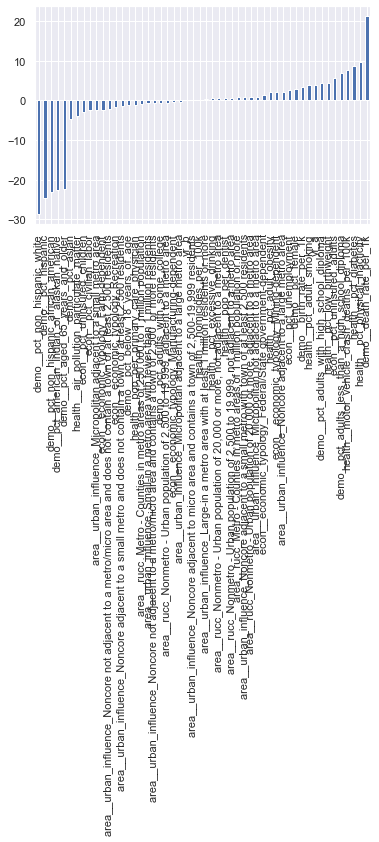

In [9]:
coef.iloc[coef.nonzero()].sort_values().plot.bar()

# Ridge

C:\Users\lyum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



best alpha {'alpha': 1} test_R2 0.6754359257058005


demo__pct_non_hispanic_white                                                                                               -28.981700
demo__pct_hispanic                                                                                                         -24.902610
demo__pct_non_hispanic_african_american                                                                                    -23.411587
demo__pct_american_indian_or_alaskan_native                                                                                -22.703459
demo__pct_aged_65_years_and_older                                                                                          -22.290955
demo__pct_asian                                                                                                             -4.802739
health__air_pollution_particulate_matter                                                                                    -3.855992
demo__pct_adults_bachelors_or_higher                          

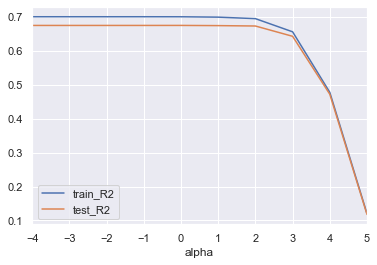

In [10]:
grid = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
ridge = Ridge()
ridgeCV = GridSearchCV(ridge,param_grid=grid,return_train_score=True)
ridgeCV.fit(features_train,targets_train)

print()
print("best alpha",ridgeCV.best_params_,'test_R2',ridgeCV.best_score_)
performance = pd.DataFrame()
performance['alpha'] = np.log10(grid['alpha'])
performance['train_R2'] = ridgeCV.cv_results_['mean_train_score'] 
performance['test_R2'] = ridgeCV.cv_results_['mean_test_score'] 

ax1 = performance.plot.line(x = 'alpha',y='train_R2')
ax = performance.plot.line(x = 'alpha',y='test_R2',ax = ax1)

ridge = ridgeCV.best_estimator_
coef = pd.Series(ridge.coef_,index = features_train.columns)
coef.sort_values()

C:\Users\lyum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


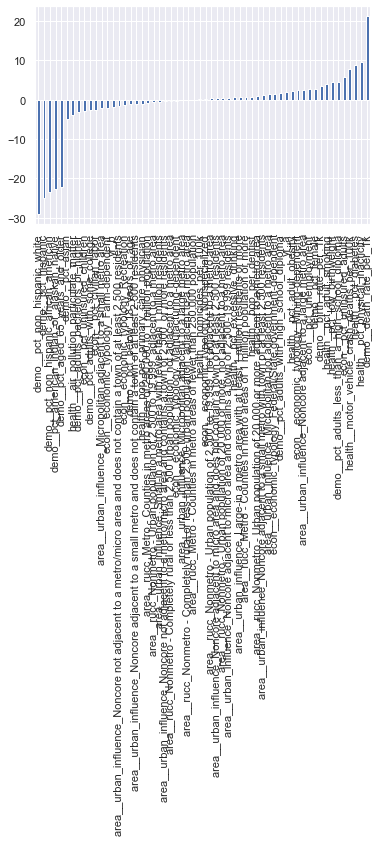

In [11]:
coef.iloc[coef.nonzero()].sort_values().plot.bar()

# Find most significant 10 features

In [12]:
negative_coef = coef.iloc[coef.nonzero()].sort_values().index[0:10]
positive_coef = coef.iloc[coef.nonzero()].sort_values().index[-11:-1]

C:\Users\lyum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.
C:\Users\lyum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


In [13]:
positive_coef

Index(['econ__pct_unemployment', 'demo__pct_female', 'demo__birth_rate_per_1k',
       'health__pct_adult_smoking', 'health__pct_low_birthweight',
       'demo__pct_adults_less_than_a_high_school_diploma',
       'econ__pct_uninsured_adults',
       'health__motor_vehicle_crash_deaths_per_100k', 'health__pct_diabetes',
       'health__pct_physical_inacticity'],
      dtype='object')

In [14]:
negative_coef

Index(['demo__pct_non_hispanic_white', 'demo__pct_hispanic',
       'demo__pct_non_hispanic_african_american',
       'demo__pct_american_indian_or_alaskan_native',
       'demo__pct_aged_65_years_and_older', 'demo__pct_asian',
       'health__air_pollution_particulate_matter',
       'demo__pct_adults_bachelors_or_higher', 'econ__pct_uninsured_children',
       'demo__pct_adults_with_some_college'],
      dtype='object')

In [15]:
total_coef = positive_coef.append(negative_coef)

In [16]:
total_coef

Index(['econ__pct_unemployment', 'demo__pct_female', 'demo__birth_rate_per_1k',
       'health__pct_adult_smoking', 'health__pct_low_birthweight',
       'demo__pct_adults_less_than_a_high_school_diploma',
       'econ__pct_uninsured_adults',
       'health__motor_vehicle_crash_deaths_per_100k', 'health__pct_diabetes',
       'health__pct_physical_inacticity', 'demo__pct_non_hispanic_white',
       'demo__pct_hispanic', 'demo__pct_non_hispanic_african_american',
       'demo__pct_american_indian_or_alaskan_native',
       'demo__pct_aged_65_years_and_older', 'demo__pct_asian',
       'health__air_pollution_particulate_matter',
       'demo__pct_adults_bachelors_or_higher', 'econ__pct_uninsured_children',
       'demo__pct_adults_with_some_college'],
      dtype='object')

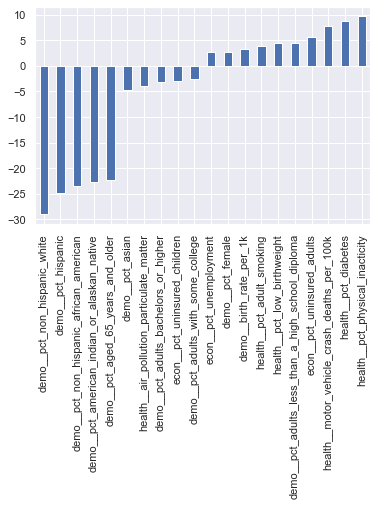

In [17]:
coef.loc[total_coef].sort_values().plot.bar()

# Testing

In [18]:
lasso = Lasso(alpha=0.01)
lasso.fit(features_train,targets_train)
print(lasso.score(features_test,targets_test))
print(lasso.score(features_train,targets_train))

0.665352460127381
0.6969795983974977


C:\Users\lyum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7057.015531076118, tolerance: 908.1907252541049
  positive)


In [19]:
rigde = Ridge(alpha=0.1)
rigde.fit(features_train,targets_train)
rigde.score(features_test,targets_test)
print(ridge.score(features_test,targets_test))
print(ridge.score(features_train,targets_train))

0.6650550968841857
0.6969885449709408


# Gradient Boost

In [20]:
time_start = time()
grid = {'n_estimators':np.arange(10,100,10),'max_depth':np.arange(1,10,1),'learning_rate':np.arange(0.01,1,0.1)}

gb = GradientBoostingRegressor()
gbCV = GridSearchCV(gb,param_grid=grid,return_train_score=True,n_jobs=-1)
gbCV.fit(features_train,targets_train)
time_stop = time()
time_elapsed = (time_stop - time_start)/60.0
print('time_elapsed =',round(time_elapsed,1),'min')

C:\Users\lyum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


time_elapsed = 6.6 min


In [21]:
print()
print(gbCV.best_params_,',validation R2 =',gbCV.best_score_.round(3))


{'learning_rate': 0.11, 'max_depth': 7, 'n_estimators': 90} ,validation R2 = 0.731


In [22]:
gb = gbCV.best_estimator_
R2_train = gb.score(features_train,targets_train)
R2_test  = gb.score(features_test,targets_test)
print('train R2 =',R2_train.round(3),'test R2 =',R2_test.round(3))

train R2 = 0.991 test R2 = 0.748


In [23]:
lin = LinearRegression()
features_train = features_train.loc[:,total_coef]
features_test = features_test.loc[:,total_coef]

In [24]:
lin.fit(features_train,targets_train.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
test = lin.predict(features_test)

In [26]:
r2_score(targets_test,test)

0.5719567061931428

In [31]:
df

,heart_disease_mortality_per_100k,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,312,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,...,0.131,0.089000,0.164841,0.332,13.0,2.800000,15.090000,1650.000000,1489.0,a
1,257,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,...,0.090,0.082000,0.181000,0.265,10.0,2.300000,19.790000,2010.000000,2480.0,a
2,195,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,...,0.084,0.098000,0.195000,0.209,10.0,9.310000,3.140000,629.000000,690.0,b
3,218,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,...,0.104,0.058000,0.164841,0.238,13.0,5.947498,21.132618,1810.000000,6630.0,b
4,355,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,...,0.137,0.070000,0.194000,0.290,9.0,5.947498,29.390000,3489.000000,2590.0,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,239,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Federal/State government-dependent,0.497,0.042,0.191,0.062,0.490,0.235,...,0.089,0.083000,0.171000,0.278,10.0,5.947498,24.440000,1490.000000,1820.0,b
3194,308,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a small metro and does not...,Manufacturing-dependent,0.419,0.066,0.224,0.092,0.503,0.188,...,0.112,0.084000,0.123000,0.265,13.0,5.947498,23.450000,6229.000000,3060.0,b
3195,262,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Nonspecialized,0.503,0.060,0.204,0.113,0.486,0.251,...,0.095,0.083896,0.164841,0.225,10.0,5.947498,21.132618,3431.433649,940.0,b
3196,259,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a small metro area,Manufacturing-dependent,0.510,0.036,0.239,0.126,0.509,0.266,...,0.110,0.054000,0.112000,0.267,13.0,5.947498,19.450000,2609.000000,1559.0,a


In [33]:
for i in range(34):
    num = df.iloc[:,i].isna().sum()
    print(df.columns[i],num)

heart_disease_mortality_per_100k 0
area__rucc 0
area__urban_influence 0
econ__economic_typology 0
econ__pct_civilian_labor 0
econ__pct_unemployment 0
econ__pct_uninsured_adults 0
econ__pct_uninsured_children 0
demo__pct_female 0
demo__pct_below_18_years_of_age 0
demo__pct_aged_65_years_and_older 0
demo__pct_hispanic 0
demo__pct_non_hispanic_african_american 0
demo__pct_non_hispanic_white 0
demo__pct_american_indian_or_alaskan_native 0
demo__pct_asian 0
demo__pct_adults_less_than_a_high_school_diploma 0
demo__pct_adults_with_high_school_diploma 0
demo__pct_adults_with_some_college 0
demo__pct_adults_bachelors_or_higher 0
demo__birth_rate_per_1k 0
demo__death_rate_per_1k 0
health__pct_adult_obesity 0
health__pct_adult_smoking 0
health__pct_diabetes 0
health__pct_low_birthweight 0
health__pct_excessive_drinking 0
health__pct_physical_inacticity 0
health__air_pollution_particulate_matter 0
health__homicides_per_100k 0
health__motor_vehicle_crash_deaths_per_100k 0
health__pop_per_dentist 0


In [34]:
df.dtypes

heart_disease_mortality_per_100k                      int64
area__rucc                                           object
area__urban_influence                                object
econ__economic_typology                              object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school

In [30]:
import nltk
  
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True